# <font color='green'> <b>Importing Libraries </b><font color='black'>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings('ignore')

## <font color='blue'> <b>pivot() vs pivot_table()</b><font color='black'>
pivot(): transforms data from one DataFrame to another DataFrame and groups data by a column. While this method is used to transform data into a new structure, it does not perform any aggregation or grouping functions. Cannot be used when there are duplicated values.

pivot_table(): groups by one or more columns, resulting in a pivot table. This method is used to group and summarize data by operations such as addition, average, median, minimudm, maximum, counting. Useful when there are duplicated values.

[SOURCE01](https://www.quora.com/In-pandas-whats-the-difference-between-dataframe-pivot-and-dataframe-pivot_table),
[SOURCE02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html),
[SOURCE03](https://www.w3resource.com/pandas/dataframe/dataframe-pivot.php),
[SOURCE04](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html),
[SOURCE05](https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/),
[SOURCE06](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)
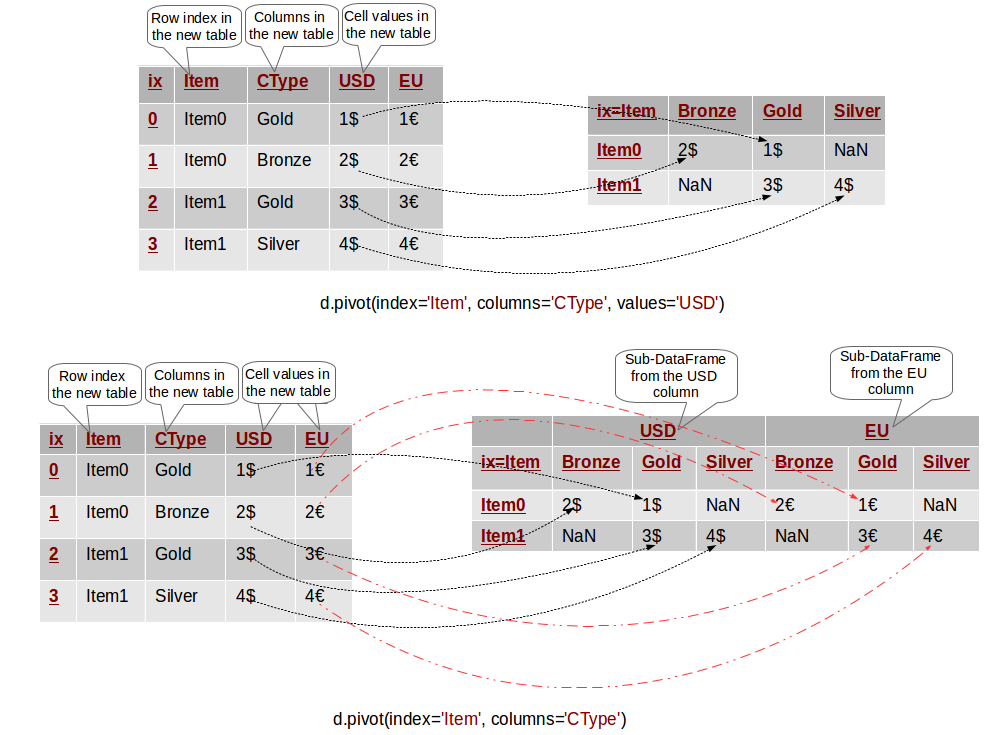
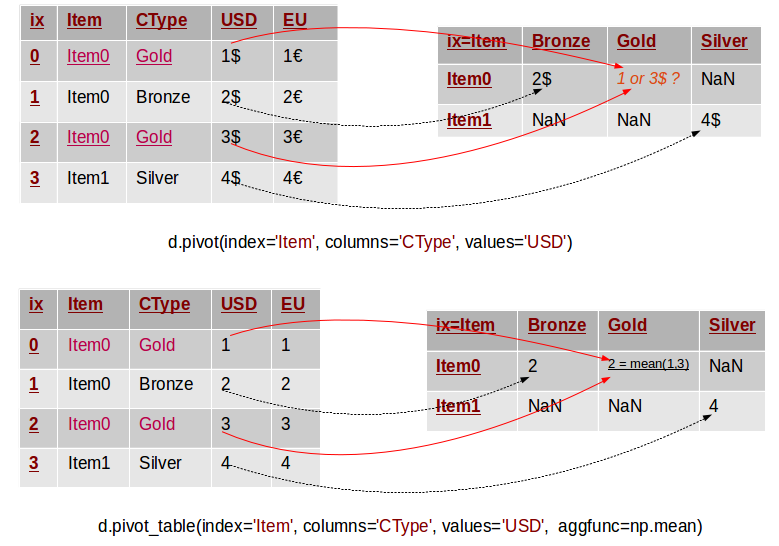

# <font color='red'> <b>Diamonds data set</b><font color='black'>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
df.describe().T # T -> transpose

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


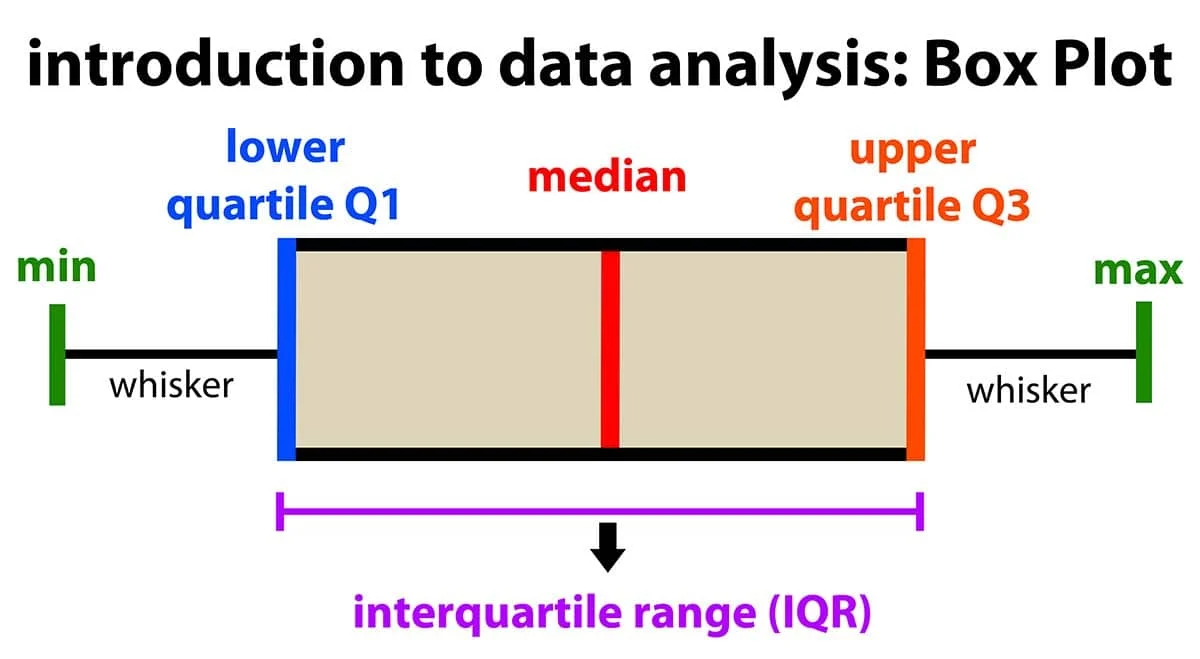

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# statistical table for object data type
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9
z,53940.0,NaN,NaN,NaN,3.538734,0.705699,0.0,2.91,3.53,4.04,31.8


In [10]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.groupby('cut')[['price']].mean()
# there is not clear data analyses because prices are very close to each other

,price
cut,
Ideal,3457.541970
Premium,4584.257704
Very Good,3981.759891
Good,3928.864452
Fair,4358.757764


In [ ]:
df.groupby('cut')[['price']].agg([min,max, np.mean])
# there is not clear data analyses because min and max prices are very close to each other

price                    
            min    max         mean
cut                                
Ideal       326  18806  3457.541970
Premium     326  18823  4584.257704
Very Good   336  18818  3981.759891
Good        327  18788  3928.864452
Fair        337  18574  4358.757764

In [ ]:
df.groupby('color')[['price']].agg([min,max, np.mean])
# this data set shows that price of the dimond goes up: D<E<F<G<H<I<J
# but normally, it should be opposit, D>E>F>G>H>I>J
# it might be becuase people are buying lower enc cut or we have more data about lower end quality of dimonds

price                    
        min    max         mean
color                          
D       357  18693  3169.954096
E       326  18731  3076.752475
F       342  18791  3724.886397
G       354  18818  3999.135671
H       337  18803  4486.669196
I       334  18823  5091.874954
J       335  18710  5323.818020

In [ ]:
df.groupby('carat')[['price']].agg([min,max, np.mean])
# there is positive correlation, more carat higher price

price                     
         min    max          mean
carat                            
0.20     345    367    365.166667
0.21     326    394    380.222222
0.22     337    470    391.400000
0.23     326    688    486.143345
0.24     336    963    505.185039
...      ...    ...           ...
4.00   15984  15984  15984.000000
4.01   15223  15223  15223.000000
4.13   17329  17329  17329.000000
4.50   18531  18531  18531.000000
5.01   18018  18018  18018.000000

[273 rows x 3 columns]

In [ ]:
df['carat'].corr(df['price'])
# if the corr is close to 1 , it means there is higly positive correlation

0.921591301193476

In [ ]:
df.groupby(['carat','color'])[['price']].agg([min,max,np.mean]).head(40)
# some of the data is retured as NaN, that means our table does not have a data for some
# these affects min, max numers, we need to cllean the NaN values

price                    
               min     max        mean
carat color                           
0.20  D      367.0   367.0  367.000000
      E      345.0   367.0  364.250000
      F      367.0   367.0  367.000000
      G        NaN     NaN         NaN
      H        NaN     NaN         NaN
      I        NaN     NaN         NaN
      J        NaN     NaN         NaN
0.21  D      386.0   386.0  386.000000
      E      326.0   394.0  375.600000
      F        NaN     NaN         NaN
      G        NaN     NaN         NaN
      H        NaN     NaN         NaN
      I        NaN     NaN         NaN
      J        NaN     NaN         NaN
0.22  D      404.0   404.0  404.000000
      E      337.0   404.0  370.500000
      F      342.0   470.0  406.000000
      G        NaN     NaN         NaN
      H        NaN     NaN         NaN
      I        NaN     NaN         NaN
      J        NaN     NaN         NaN
0.23  D      357.0   688.0  493.355556
      E      326.0   682.0  497.133858
      F      357.0   650.0  493.013158
      G      354.0   550.0  447.931034
      H      338.0   512.0  421.230769
      I      414.0   414.0  414.000000
      J      340.0   340.0  340.000000
0.24  D      367.0   710.0  509.214286
      E      357.0   752.0  504.726190
      F      370.0   963.0  523.292135
      G      364.0   559.0  497.347826
      H      391.0   554.0  473.045455
      I      336.0   523.0  412.500000
      J      336.0   432.0  384.000000
0.25  D      388.0   696.0  496.571429
      E      361.0   783.0  576.053333
      F      430.0  1013.0  582.810345
      G      363.0  1186.0  530.117647
      H      357.0   577.0  475.550000

In [ ]:
df.groupby(['carat','color'])[['price']].agg([min,max,np.mean]).tail(40)
# when we looks at the data for higher carat, we can see that we dont have much data for D,E,F,G colors, which are better colors

price                  
                 min      max     mean
carat color                           
3.67  F          NaN      NaN      NaN
      G          NaN      NaN      NaN
      H          NaN      NaN      NaN
      I      16193.0  16193.0  16193.0
      J          NaN      NaN      NaN
4.00  D          NaN      NaN      NaN
      E          NaN      NaN      NaN
      F          NaN      NaN      NaN
      G          NaN      NaN      NaN
      H          NaN      NaN      NaN
      I      15984.0  15984.0  15984.0
      J          NaN      NaN      NaN
4.01  D          NaN      NaN      NaN
      E          NaN      NaN      NaN
      F          NaN      NaN      NaN
      G          NaN      NaN      NaN
      H          NaN      NaN      NaN
      I      15223.0  15223.0  15223.0
      J      15223.0  15223.0  15223.0
4.13  D          NaN      NaN      NaN
      E          NaN      NaN      NaN
      F          NaN      NaN      NaN
      G          NaN      NaN      NaN
      H      17329.0  17329.0  17329.0
      I          NaN      NaN      NaN
      J          NaN      NaN      NaN
4.50  D          NaN      NaN      NaN
      E          NaN      NaN      NaN
      F          NaN      NaN      NaN
      G          NaN      NaN      NaN
      H          NaN      NaN      NaN
      I          NaN      NaN      NaN
      J      18531.0  18531.0  18531.0
5.01  D          NaN      NaN      NaN
      E          NaN      NaN      NaN
      F          NaN      NaN      NaN
      G          NaN      NaN      NaN
      H          NaN      NaN      NaN
      I          NaN      NaN      NaN
      J      18018.0  18018.0  18018.0

In [23]:
df.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


- when we looks the above or below table, we can read following:
    - depth and pricehas negative correlation -> -0.010647
        - as depth get higher, the price gets lower
    - carat and price has highly positive correlation -> 0.921591, close to 1
    - table and price has positive correlation -> 0.127134
        - but it does not affect too much

In [24]:
df.select_dtypes(include='number').corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [25]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- **convert cut to numerical data (for machine learning)**

In [26]:
df['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [27]:
df.cut.map({'Premium':0, 'Ideal':1, 'Very Good':2, 'Good': 3, 'Fair':4})

0        1
1        0
2        3
3        0
4        3
        ..
53935    1
53936    3
53937    2
53938    0
53939    1
Name: cut, Length: 53940, dtype: category
Categories (5, int64): [1, 0, 2, 3, 4]

In [28]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df.groupby(['cut','color'])[['price']].count()

price
cut       color       
Ideal     D       2834
          E       3903
          F       3826
          G       4884
          H       3115
          I       2093
          J        896
Premium   D       1603
          E       2337
          F       2331
          G       2924
          H       2360
          I       1428
          J        808
Very Good D       1513
          E       2400
          F       2164
          G       2299
          H       1824
          I       1204
          J        678
Good      D        662
          E        933
          F        909
          G        871
          H        702
          I        522
          J        307
Fair      D        163
          E        224
          F        312
          G        314
          H        303
          I        175
          J        119

In [ ]:
# sort the values by price column, acsending order
df.groupby(['cut','color'])[['price']].count().sort_values(by= 'price')

price
cut       color       
Fair      J        119
          D        163
          I        175
          E        224
          H        303
Good      J        307
Fair      F        312
          G        314
Good      I        522
          D        662
Very Good J        678
Good      H        702
Premium   J        808
Good      G        871
Ideal     J        896
Good      F        909
          E        933
Very Good I       1204
Premium   I       1428
Very Good D       1513
Premium   D       1603
Very Good H       1824
Ideal     I       2093
Very Good F       2164
          G       2299
Premium   F       2331
          E       2337
          H       2360
Very Good E       2400
Ideal     D       2834
Premium   G       2924
Ideal     H       3115
          F       3826
          E       3903
          G       4884

# <font color='red'> <b>Missing Values</b><font color='black'>

## <font color='green'> <b>Type of NaN Values</b><font color='black'>

**None**:
    - means "nothing" in Python.
    - Used in Python to indicate that an object has no value.
    - Its type is NoneType and it has only one value: None.
    - For example, if a function does not return any value, Python automatically returns None.
   
**nan and NaN**:
    - It is an abbreviation for "Not a Number".
    - Represents a value of type float.
    - It is used to show non-numeric values.
    - It is also used to represent missing data in libraries such as Pandas and Numpy.
    - always returns False when nan values are compared to equality. That is, the expression nan == nan returns False.
    - There is no technical difference between nan and NaN. Different spellings are preferred in different sources or libraries, but they both mean the same thing.

**In summary**:
- None is a Python unique value and means "no value".
- nan or NaN represents non-numeric values and is often used for missing data or operations that are not mathematically defined.

These two values belong to different types and are used for different situations.

In practice, you often encounter NaN values in Pandas when analyzing data. But in general Python programming, None is more common.

In [17]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
    "id" : id_no,
    "gender": gender,
    "status": status,
    "dept": dept,
    "var1" : V1,
    "var2" : V2,
    "salary" : salary
})


In [18]:
df = df0.copy()

In [19]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [ ]:
df.info()
# even though we have some null values enteries, like "-", "nan", python does not see them as null values
# we have tho clean tose null values as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
df.isnull()
# this is not easy to read

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [40]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [39]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [42]:
type(np.nan) # Not a number -> nan

float

In [43]:
type(np.NaN)

float

In [ ]:
type(None)
# there is no dtype for None

NoneType

In [46]:
pd.Series([0, np.nan,np.NaN, None])

0    0.0
1    NaN
2    NaN
3    NaN
dtype: float64

In [13]:
print("1", 0 * np.nan)
print("2", np.nan - np.nan)
print("3", np.nan + np.nan)
print("4", np.nan - 10)
print("5", np.nan + 10)
print("6", np.nan == np.nan) # Not equal as a value because it is undefined.
print("7", 10 > np.nan)
print("8", np.inf > np.nan) # Since the value is undefined,
                            # even when we check infinity > nan, it returns false.
print("9", float('-inf') < np.nan < float('inf')) # nan is not a value that falls 
                                                 # between negative infinity and positive infinity.
print("10", np.nan is np.nan) # When you check with 'is', you are comparing the id values,
                              # i.e., the memory location, and these are the same.
                              # However, this does not mean that the values are the same.

        

1 nan
2 nan
3 nan
4 nan
5 nan
6 False
7 False
8 False
9 False
10 True


## <font color='green'> <b>Detecting Missing Values</b><font color='black'>

In [16]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [54]:
df.isnull()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [55]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [ ]:
df.isnull()
df.isna()
# you can prefer to use either one of them 

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [ ]:
df.notnull() 
#if the data is null it shows as false 

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [ ]:
df.notna() 
# returns the not null values as true, similar to notnull

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [ ]:
df.isnull().any() 
# if there is any null values, show it to me
# the default axis = 0 
# which means it works on rows, 
# we fix the column and look at rows

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [66]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [65]:
df.isnull().any(axis=1)# fix the row and check the column 

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [ ]:
df[df.isnull().any(axis=1)] 
# returns the rows which include nan values

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [ ]:
df.isnull().sum().sum() 
# how many  nan values are in my df

9

In [73]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


## <font color='green'> <b>Converting Improper Values to NaN Values</b><font color='black'>

In [75]:
df['var1']

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [20]:
df['var1'].replace(to_replace='-',value=np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [77]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [ ]:
# make the chnages perminant
df['var1'] = df['var1'].replace(to_replace='-',value=np.nan)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    10 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 748.0+ bytes


In [23]:
# changing data type to float because values "nan" will be change to Null values
df['var1'] = df['var1'].astype('float')
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,-,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,-,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    8 non-null      float64
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 748.0+ bytes


In [84]:
df['status']

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [26]:
# replace "-" on status column to NaN
df['status'] = df['status'].replace(to_replace='-',value= np.nan)

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  8 non-null      object 
 3   dept    9 non-null      object 
 4   var1    8 non-null      float64
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 748.0+ bytes


## <font color='green'> <b>Missing Value Handling Methods</b><font color='black'>

- Sometimes we will need to fill in the missing values if we can according to the data set, 
- to be able to fill in , we might use mean, median, or the previous value, or the next value 
- weather forecast , it is more sensible to use either the previous or the next value, 
- but if it is not poossible to fill in or if there are too many nan values ,then we may decide to delete them . 

## <font color='blue'> <b>dropna() & drop()</b><font color='black'>

In [88]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.dropna() 
# it deleted the rest of the rows. 
# returns only one row which does not have any nan data

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [28]:
df.dropna(axis=0,how='any') 
# if there is any nan value , deletes the row

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [ ]:
df.dropna(axis=0,how='all') 
#  it deletes a row if all the values of it is nan.
# there is not such a row where all the values are nana, so non of the rows are deleted

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.dropna(axis=1,how='any',inplace=False) 
# deletes the column if there is any nan value
# only id and gendercolumns that do not have any nan values

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [30]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [31]:
df.dropna(axis=1, thresh=9)
# At least there should be 9 not nan values, other wise deletes rest of them

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


In [98]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [32]:
df.drop([5,6,10])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [100]:
df.drop(index=[5,6,10])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [33]:
df.drop('var2', axis=1)

,id,gender,status,dept,var1,salary
0,P001,M,FT,DS,2.0,NaN
1,P002,F,PT,FS,3.0,54
2,P003,M,NaN,AWS,5.0,59
3,P004,F,FT,AWS,NaN,120
4,P005,M,PT,DS,7.0,58
5,P006,F,PT,None,1.0,75
6,P007,M,FT,FS,NaN,None
7,P008,F,NaN,FS,10.0,136
8,P009,M,PT,NaN,14.0,60
9,P010,F,FT,DS,NaN,125


In [103]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [34]:
df.drop(['var2','gender','salary'],axis=1)

,id,status,dept,var1
0,P001,FT,DS,2.0
1,P002,PT,FS,3.0
2,P003,NaN,AWS,5.0
3,P004,FT,AWS,NaN
4,P005,PT,DS,7.0
5,P006,PT,None,1.0
6,P007,FT,FS,NaN
7,P008,NaN,FS,10.0
8,P009,PT,NaN,14.0
9,P010,FT,DS,NaN


In [35]:
df.drop(columns=['var2','gender'])

,id,status,dept,var1,salary
0,P001,FT,DS,2.0,NaN
1,P002,PT,FS,3.0,54
2,P003,NaN,AWS,5.0,59
3,P004,FT,AWS,NaN,120
4,P005,PT,DS,7.0,58
5,P006,PT,None,1.0,75
6,P007,FT,FS,NaN,None
7,P008,NaN,FS,10.0,136
8,P009,PT,NaN,14.0,60
9,P010,FT,DS,NaN,125
